# **XGBoost Classification & Regression in R**

## **XGBoost Classification**
### **Loading the dataset**

In [1]:
# Importing the dataset
ds = read.csv('/content/Churn_Modelling.csv')
ds = ds[4:14]

### **Data Preprocessing**

In [2]:
# Encoding the categorical variables as factors
ds$Geography = as.numeric(factor(ds$Geography,
                                      levels = c('France', 'Spain', 'Germany'),
                                      labels = c(1, 2, 3)))
ds$Gender = as.numeric(factor(ds$Gender,
                                   levels = c('Female', 'Male'),
                                   labels = c(1, 2)))

# Splitting the dataset into the Training set and Test set
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Exited, SplitRatio = 0.8)
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### **Applying XGBoost**

In [3]:
# Fitting XGBoost to the Training set
install.packages('xgboost')
library(xgboost)
classifier = xgboost(data = as.matrix(train_set[-11]), label = train_set$Exited, nrounds = 10, verbose = 0)

# Predicting the Test set results
y_pred = predict(classifier, newdata = as.matrix(test_set[-11]))
y_pred = (y_pred >= 0.5)

# Making the Confusion Matrix
cm = table(test_set[, 11], y_pred)

#Evaluation Metrics
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
cat("\n Accuracy of XG Boost  Model is:", accuracy)  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall)
cat("\n \nThe Evaluation Metrics of XG Boost  Model is: \n \n")
data.frame(precision, recall, f1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




 Accuracy of XG Boost  Model is: 0.8685
 
The Evaluation Metrics of XG Boost  Model is: 
 


,precision,recall,f1
,<dbl>,<dbl>,<dbl>
FALSE,0.8795662,0.9673572,0.9213752
TRUE,0.7903226,0.4815725,0.5984733


In [4]:
install.packages('MLmetrics')
library(MLmetrics)
#accuracy = Accuracy(y_pred, test_set[11])
accuracy = MLmetrics::Accuracy(y_pred, test_set[11])
cat("\n Accuracy computed using MLmetrics of XG Boost  Model is:", accuracy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall





 Accuracy computed using MLmetrics of XG Boost  Model is: 0.8685

### **Applying k-Fold Cross Validation**

In [5]:
install.packages('caret')
library(caret)
folds = createFolds(train_set$Exited, k = 10)
cv = lapply(folds, function(x) {
  training_fold = train_set[-x, ]
  test_fold = train_set[x, ]
  classifier = xgboost(data = as.matrix(training_fold[-11]), label = training_fold$Exited, nrounds = 10, verbose = 0)
  y_pred = predict(classifier, newdata = as.matrix(test_fold[-11]))
  #y_pred = (y_pred >= 0.5)
  y_pred = ifelse(y_pred > 0.5, 1, 0)  
  cm = table(test_fold[, 11], y_pred)          
  accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
  return(accuracy)
})
accuracy = mean(as.numeric(cv))
cat("\n Mean Accuracy of XGBoost Model is:", accuracy)  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘caret’


The following objects are masked from ‘package:MLmetrics’:

    MAE, RMSE





 Mean Accuracy of XGBoost Model is: 0.858375

## **XGBoost Regression**
### **Data Preprocessing**
**Data Set Information:**

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

**Attribute Information:**

Features consist of hourly average ambient variables
* Temperature (AT) in the range 1.81°C and 37.11°C,
* Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
* Relative Humidity (RH) in the range 25.56% to 100.16%
* Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
* Net hourly electrical energy output (PE) 420.26-495.76 MW

### **Importing the dataset**

In [6]:
ds = read.csv('/content/Power Plant Data.csv')
cat("First three rows of dataset", "\n")
head(ds, 3)

First three rows of dataset 


,AT,V,AP,RH,PE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.96,41.76,1024.07,73.17,463.26
2,25.18,62.96,1020.04,59.08,444.37
3,5.11,39.40,1012.16,92.14,488.56


In [7]:
#find number of rows with missing values
sum(!complete.cases(ds))

[1] 0

In [8]:
#Splitting the dataset into the Train set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$PE, SplitRatio = 4/5)


train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)

### **Multiple Linear Regression**

In [9]:
# Fitting Multiple Linear Regression to the Training set
regressor = lm(formula = PE ~ .,
               data = train_set)

# Predicting the Test set results
y_pred = predict(regressor, newdata = test_set)
head(y_pred)

summary(regressor)
summary(regressor)$r.squared

4        5        8       11       16       20 
450.5647 471.9209 478.1966 459.6331 458.2768 472.3271


Call:
lm(formula = PE ~ ., data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.081  -3.145  -0.083   3.148  17.801 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 462.198326  10.867285   42.53  < 2e-16 ***
AT           -1.981035   0.017051 -116.18  < 2e-16 ***
V            -0.236547   0.008129  -29.10  < 2e-16 ***
AP            0.054833   0.010545    5.20 2.04e-07 ***
RH           -0.158473   0.004664  -33.98  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.563 on 7649 degrees of freedom
Multiple R-squared:  0.9288,	Adjusted R-squared:  0.9288 
F-statistic: 2.496e+04 on 4 and 7649 DF,  p-value: < 2.2e-16


[1] 0.928832

In [10]:
test_set_df = data.frame(test_set$PE)
y_pred_df = data.frame(y_pred)
# combine two datasets in r
y_test_compare =cbind(y_pred_df, test_set_df)
head(y_test_compare,10)

,y_pred,test_set.PE
,<dbl>,<dbl>
4,450.5647,446.48
5,471.9209,473.90
8,478.1966,478.42
11,459.6331,453.02
16,458.2768,462.19
20,472.3271,464.30
21,461.8123,468.27
24,441.2787,443.61
31,448.6454,445.11



*   cbind() – combining the columns of two data frames side-by-side
*   rbind() – stacking two data frames on top of each other, appending one to the other
*   merge() – joining two data frames using a common column


#### **Statistics using rcompanion**
**Details of rcompanion**

Produces a table of fit statistics for multiple models: minimum maximum accuracy, mean absolute
percentage error, root mean square error, normalized root mean square error, accuracy based on
normalized root mean square error, Efron’s pseudo r-squared, and coefficient of variation.
* For minimum maximum accuracy, larger indicates a better fit, and a perfect fit is equal to 1.Min_Max_accuracy will find out accuracy rate of each row. it can be considered accuracy rate of the model. 
* For mean absolute error (MAE), smaller indicates a better fit, and a perfect fit is equal to 0. It has the
same units as the dependent variable. Note that here, MAE is simply the mean of the absolute values
of the differences of predicted values and the observed values (MAE = mean(abs(predy -actual))).
There are other definitions of MAE and similar-sounding terms.
* For mean absolute percent error (MAPE), smaller indicates a better fit, and a perfect fit is equal to
0.
* Root mean square error (RMSE) has the same units as the predicted values.
* Normalized root mean square error (NRMSE) is RMSE divided by the mean or the median of the values of the dependent variable. NRMSE accuracy values are calculated as 1 minus NRMSE. Larger indicates a better fit, and a perfect fit is equal to 1.
* Efron’s pseudo r-squared is calculated as 1 minus the residual sum of squares divided by the total
sum of squares. For linear models (lm model objects), Efron’s pseudo r-squared will be equal to
r-squared. For other models, it should not be interpreted as r-squared, but can still be useful as a
relative measure.
* CV.prcnt is the coefficient of variation for the model. Here it is expressed as a percent.

Model objects currently supported: lm, glm, nls, betareg, gls, lme, lmer, lmerTest, rq, loess, gam,
glm.nb, glmRob.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rootSolve’, ‘lmom’, ‘TH.data’, ‘sandwich’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’, ‘BH’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘multcomp’, ‘zoo’, ‘DescTools’, ‘multcompView’, ‘coin’, ‘lmtest’, ‘nortest’




$Models
  Call                                    
1 "lm(formula = PE ~ ., data = train_set)"

$Fit.criteria
  Min.max.accuracy  MAE MedAE    MAPE  MSE RMSE NRMSE.mean NRMSE.median
1            0.992 3.62  3.15 0.00799 20.8 4.56       0.01       0.0101
  Efron.r.squared CV.prcnt
1           0.929        1

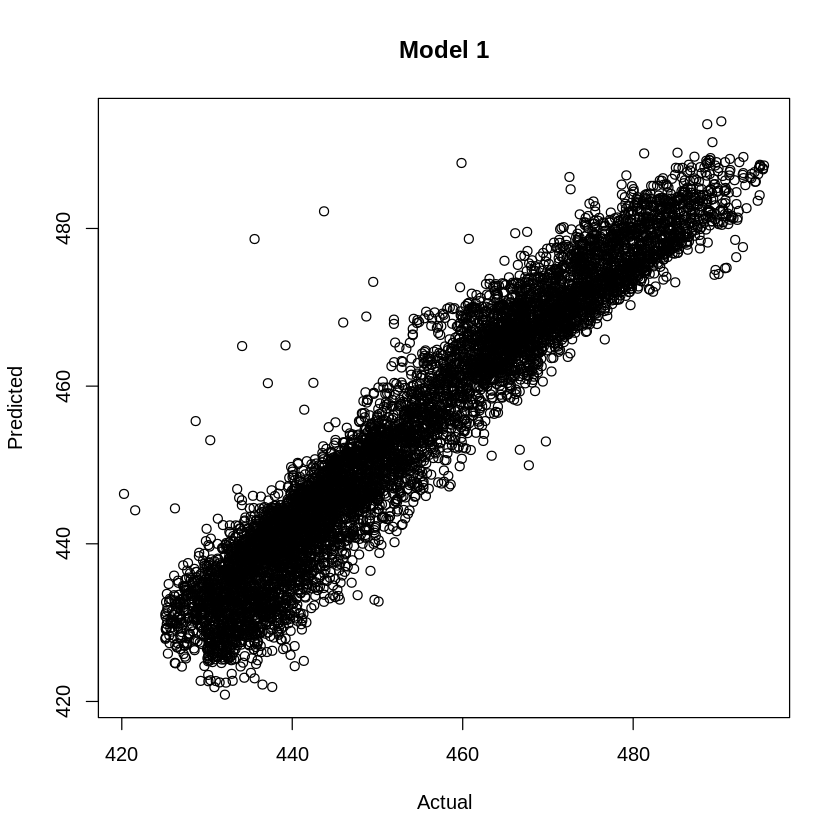

In [12]:
install.packages('rcompanion')
library(rcompanion)
metric = accuracy(list(regressor),plotit=TRUE, digits = 3)
metric

#### **Evaluation Metrics**

In [13]:
d = test_set$PE-y_pred
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((test_set$PE-mean(test_set$PE))^2))

cat(" MAE:", mae, "\n", "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", "R-squared:", R2)

 MAE: 3.630362 
 MSE: 20.61541 
 RMSE: 4.54042 
 R-squared: 0.9280941

### **Define the model by using the xgboost() function of xgboost package**

In [14]:
train_x = data.matrix(train_set[, -5])
train_y = train_set[,5]

test_x = data.matrix(test_set[, -5])
test_y = test_set[, 5]

# install.packages('xgboost')
library(xgboost)
xgb_train = xgb.DMatrix(data = train_x, label = train_y)
xgb_test = xgb.DMatrix(data = test_x, label = test_y)

#### **Fitting the model and prediction**

In [15]:
xgbc = xgboost(data = xgb_train, max.depth = 2, nrounds = 50, verbose = 0)
xgbc

##### xgb.Booster
raw: 39 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max.depth = 2)
params (as set within xgb.train):
  max_depth = "2", validate_parameters = "1"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 4 
niter: 50
nfeatures : 4 
evaluation_log:
    iter train_rmse
       1 318.047058
       2 222.725052
---                
      49   3.930269
      50   3.926616

In [16]:
pred_y = predict(xgbc, xgb_test)
y_pred_df = data.frame(y_pred)
# combine two datasets in r
y_test_compare =cbind(y_pred, test_y)
head(y_test_compare,10)

,y_pred,test_y
4,450.5647,446.48
5,471.9209,473.90
8,478.1966,478.42
11,459.6331,453.02
16,458.2768,462.19
20,472.3271,464.30
21,461.8123,468.27
24,441.2787,443.61
31,448.6454,445.11
32,442.0436,438.86


#### **Evaluation Metrics**

In [17]:
d = test_y-y_pred
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((test_y-mean(test_y))^2))

cat(" MAE:", mae, "\n", "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", "R-squared:", R2)

 MAE: 3.630362 
 MSE: 20.61541 
 RMSE: 4.54042 
 R-squared: 0.9280941

In [18]:
y_pred = predict(xgbc, xgb_test)
mse = mean((test_y - y_pred)^2)
mae = caret::MAE(test_y, y_pred)
rmse = caret::RMSE(test_y, y_pred)

# Calculate total sum of squares (tss)
y_test_mean = mean(test_y)
tss =  sum((test_y - y_test_mean)^2 )

# Calculate residual sum of squares (rss)
residuals = test_y - y_pred
rss =  sum(residuals^2)

# Calculate R-squared
rsq  =  1 - (rss/tss)

cat(" MSE of the test data is: ", mse,"\n", "MAE of the test data is: ", mae,"\n", 
    "RMSE of the test data is: ", rmse, "\n", "R-squared of the test data is:", rsq)
cat('\n The R-square of the test data is ', round(rsq,3))

 MSE of the test data is:  16.21546 
 MAE of the test data is:  3.119795 
 RMSE of the test data is:  4.026842 
 R-squared of the test data is: 0.943441
 The R-square of the test data is  0.943